# CSC 575 Intelligent Information Retrieval
### Siravich Khongrod (In-class)
## Homework #3: Written questions

### 1. Retrieval from an Inverted Index:
Consider the inverted index constructed from three documents (similar to the inverted index of HW#1). Follow this 'Inverted Index Retrieval Algorithm' and use the cosine similarity measure to determine which document is more relevant to the query: "search engine index".  Show the final ranking and the corresponding similarity scores.

In [68]:
import nltk
from nltk.tokenize import word_tokenize, wordpunct_tokenize, sent_tokenize
from nltk.corpus import stopwords
docs = ['Glimpse is an indexing and query system that allows for search through a file system or document collection quickly. Glimpse is the default search engine in a larger information retrieval system. It has also been used as part of some web based search engines.'
        ,'The main processes in an retrieval system are document indexing, query processing, query evaluation and relevance feedback. Among these, efficient updating of the index is critical in large scale systems.'
        ,'Clusters are created from short snippets of documents retrieved by web search engines which are as good as clusters created from the full text of web documents.']

for i in range(0,len(docs)):
    docs[i] = docs[i].lower()

docs_token = docs

porter = nltk.PorterStemmer()
for i in range(0,3):
    docs_token[i] = word_tokenize(docs[i])
    docs_token[i] = [w for w in docs_token[i] if w not in stopwords.words('english')] # filter English stopwords
    docs_token[i] = [porter.stem(tok) for tok in docs_token[i]] # apply stemmer
    docs_token[i] = [w for w in docs_token[i] if w.isalpha()] # filter tokens that contain non-alphabetic character(s)

for doc_t in docs_token:
    print(doc_t)
    print('\n')


word_count_dict = {}

for i in range(0,len(docs_token)):
#     print(docs_token[i])
    for word in docs_token[i]:
        word_count_dict.setdefault(word,[]).append(i)


NDocs=3
NTerms=len(word_count_dict.keys())

['glimps', 'index', 'queri', 'system', 'allow', 'search', 'file', 'system', 'document', 'collect', 'quickli', 'glimps', 'default', 'search', 'engin', 'larger', 'inform', 'retriev', 'system', 'also', 'use', 'part', 'web', 'base', 'search', 'engin']


['main', 'process', 'retriev', 'system', 'document', 'index', 'queri', 'process', 'queri', 'evalu', 'relev', 'feedback', 'among', 'effici', 'updat', 'index', 'critic', 'larg', 'scale', 'system']


['cluster', 'creat', 'short', 'snippet', 'document', 'retriev', 'web', 'search', 'engin', 'good', 'cluster', 'creat', 'full', 'text', 'web', 'document']




In [77]:
# from collections import Counter
import math

query_raw='search engine index'
query_token = word_tokenize(query_raw)
query_token = [w for w in query_token if w not in stopwords.words('english')] # filter English stopwords
query_token = [porter.stem(tok) for tok in query_token] # apply stemmer
query_token = [w for w in query_token if w.isalpha()] # filter tokens that contain non-alphabetic character(s)
query_token

doc_TF={}
# CALCULATE THE TF
i=0
for doc_t in docs_token:
    TF=[]
    print('doc'+str(i))
    for token in query_token:
        print(token)
        tf=len([w for w in doc_t if token in w])/len(doc_t)
        print('tf: '+str(tf))
        TF.append(tf)
    print(TF)
    doc_TF[i]=TF
    i+=1
print()

IDF={}
# CALCULATE THE IDF
for token in query_token:
    print(token)
    print([token in doc_t for doc_t in docs_token])
    idf= 3/sum([token in doc_t for doc_t in docs_token])
    idf=math.log(idf,2)
    print('IDF: '+str(idf))
    IDF[token]=idf
#     for doc_t in docs_token:
#         print(token in doc_t)
    print()

print('TF')
print(doc_TF)
print('IDF')
print(IDF)
print()

for doc in doc_TF:
    print(0.5849625007211562**np.array(doc_TF[doc]))
    print(sum(0.5849625007211562**np.array(doc_TF[doc])))

doc0
search
tf: 0.11538461538461539
engin
tf: 0.07692307692307693
index
tf: 0.038461538461538464
[0.11538461538461539, 0.07692307692307693, 0.038461538461538464]
doc1
search
tf: 0.0
engin
tf: 0.0
index
tf: 0.1
[0.0, 0.0, 0.1]
doc2
search
tf: 0.0625
engin
tf: 0.0625
index
tf: 0.0
[0.0625, 0.0625, 0.0]

search
[True, False, True]
IDF: 0.5849625007211562

engin
[True, False, True]
IDF: 0.5849625007211562

index
[True, True, False]
IDF: 0.5849625007211562

TF
{0: [0.11538461538461539, 0.07692307692307693, 0.038461538461538464], 1: [0.0, 0.0, 0.1], 2: [0.0625, 0.0625, 0.0]}
IDF
{'search': 0.5849625007211562, 'engin': 0.5849625007211562, 'index': 0.5849625007211562}

[0.94 0.96 0.98]
2.879185162965608
[1.   1.   0.95]
2.9477914849414693
[0.97 0.97 1.  ]
2.9340847353914166


### 2. Indexing Models and Term Weighting:
Consider the following document-term table containing raw term frequencies. Answer the following questions, and in each case give the formulas you used to perform the necessary computations.

Note: you should not do these computations manually. You may use a spreadsheet program such as Microsoft Excel, or you can considering writing your own program do the computations.  In either case, include your spreadsheet or program in your assignment submissions.

|       | Term1 | Term2 | Term3 | Term4 | Term5 | Term6 | Term7 | Term8 |
|-------|-------|-------|-------|-------|-------|-------|-------|-------|
| DOC1  | 0     | 3     | 1     | 0     | 0     | 2     | 1     | 0     |
| DOC2  | 5     | 0     | 0     | 0     | 3     | 0     | 0     | 2     |
| DOC3  | 3     | 0     | 4     | 3     | 4     | 0     | 0     | 5     |
| DOC4  | 1     | 8     | 0     | 3     | 0     | 1     | 4     | 0     |
| DOC5  | 0     | 1     | 0     | 0     | 0     | 5     | 4     | 2     |
| DOC6  | 2     | 0     | 2     | 0     | 0     | 4     | 0     | 1     |
| DOC7  | 2     | 5     | 0     | 3     | 0     | 1     | 4     | 2     |
| DOC8  | 3     | 3     | 0     | 2     | 0     | 0     | 1     | 3     |
| DOC9  | 0     | 0     | 3     | 3     | 3     | 0     | 0     | 0     |
| DOC10 | 1     | 0     | 5     | 0     | 2     | 4     | 0     | 2     |

In [41]:
import numpy
DT=[[0,3,1,0,0,2,1,0],
	[5,0,0,0,3,0,0,2],
	[3,0,4,3,4,0,0,5],
	[1,8,0,3,0,1,4,0],
	[0,1,0,0,0,5,4,2],
	[2,0,2,0,0,4,0,1],
	[2,5,0,3,0,1,4,2],
	[3,3,0,2,0,0,1,3],
	[0,0,3,3,3,0,0,0],
	[1,0,5,0,2,4,0,2]]

# numpy.matrix.transpose(DT)
TD=numpy.asarray(DT).transpose()
print(TD.shape)
# calculate document frequency
# DF = TD.sum(axis=1)
DF = np.array([(TD!=0).sum(1)]).T
DF

(8, 10)


array([[7],
       [5],
       [5],
       [5],
       [4],
       [6],
       [5],
       [7]])

In [46]:
import numpy as np
NMatrix=numpy.ones(numpy.shape(TD), dtype=float)*10
IDF = np.log2(np.divide(NMatrix, DF))
# NMatrix.transpose()
NMatrix.shape
# IDF = np.divide(NMatrix.transpose(), DF)
TD_tfidf = TD * IDF
TD_tfidf

array([[0.        , 2.57286586, 1.54371952, 0.51457317, 0.        ,
        1.02914635, 1.02914635, 1.54371952, 0.        , 0.51457317],
       [3.        , 0.        , 0.        , 8.        , 1.        ,
        0.        , 5.        , 3.        , 0.        , 0.        ],
       [1.        , 0.        , 4.        , 0.        , 0.        ,
        2.        , 0.        , 0.        , 3.        , 5.        ],
       [0.        , 0.        , 3.        , 3.        , 0.        ,
        0.        , 3.        , 2.        , 3.        , 0.        ],
       [0.        , 3.96578428, 5.28771238, 0.        , 0.        ,
        0.        , 0.        , 0.        , 3.96578428, 2.64385619],
       [1.47393119, 0.        , 0.        , 0.73696559, 3.68482797,
        2.94786238, 0.73696559, 0.        , 0.        , 2.94786238],
       [1.        , 0.        , 0.        , 4.        , 4.        ,
        0.        , 4.        , 1.        , 0.        , 0.        ],
       [0.        , 1.02914635, 2.5728658

#### a. Compute the new weights for all the terms in document DOC4 using the tf x idf approach. 
 
#### b. Compute the new weights for all the terms in documents DOC4 using the signal-to-noise ratio approach. 
 
#### c. Using the Keyword Discrimination approach, determine if Term4 is a good index term or not (by computing it's discriminant). To compute average similarities use Cosine similarity as your similarity measure. Show your work.

### 3. Vector-Space Retrieval Model:
Consider the following document-term table with 10 documents and 8 terms (A through H) containing raw term frequencies. We also have a specified query, Q, with the indicated raw term weights (the bottom row in the table). Answer the following questions, and in each case give the formulas you used to perform the necessary computations. Note: You should do this problem using a spreadsheet program such as Microsoft Excel. Alternatively, you can write a program to perform the computations. Please include your worksheets or code in the assignment submission). [Download the table below as an Excel Spreadsheet]:

|       | A | B | C | D | E | F | G | H |
|-------|---|---|---|---|---|---|---|---|
| DOC1  | 0 | 3 | 4 | 0 | 0 | 2 | 4 | 0 |
| DOC2  | 5 | 5 | 0 | 0 | 4 | 0 | 4 | 3 |
| DOC3  | 3 | 0 | 4 | 3 | 4 | 0 | 0 | 5 |
| DOC4  | 0 | 7 | 0 | 3 | 2 | 0 | 4 | 3 |
| DOC5  | 0 | 1 | 0 | 0 | 0 | 5 | 4 | 2 |
| DOC6  | 2 | 0 | 2 | 0 | 0 | 4 | 0 | 1 |
| DOC7  | 3 | 5 | 3 | 4 | 0 | 0 | 4 | 2 |
| DOC8  | 0 | 3 | 0 | 0 | 0 | 4 | 4 | 2 |
| DOC9  | 0 | 0 | 3 | 3 | 3 | 0 | 0 | 1 |
| DOC10 | 0 | 5 | 0 | 0 | 0 | 4 | 4 | 2 |
|       |   |   |   |   |   |   |   |   |
| Query | 2 | 1 | 1 | 0 | 2 | 0 | 3 | 0 |

In [4]:
termFreq=[  [0,3,4,0,0,2,4,0],
            [5,5,0,0,4,0,4,3],
            [3,0,4,3,4,0,0,5],
            [0,7,0,3,2,0,4,3],
            [0,1,0,0,0,5,4,2],
            [2,0,2,0,0,4,0,1],
            [3,5,3,4,0,0,4,2],
            [0,3,0,0,0,4,4,2],
            [0,0,3,3,3,0,0,1],
            [0,5,0,0,0,4,4,2]]

### 4. Probabilistic Retrieval Model:

We are interested in using the following document-term matrix and the associated relevance information as training data for a probabilistic retrieval model. A 1 entry indicates that the term occurs in a document, and 0 means it does not: R or NR indicate the relevance of the document with respect to queries in the training data.
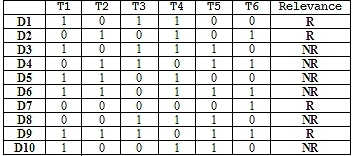
Using the basic probabilistic retrieval model, compute the relevance and non-relevance probabilities associated with terms T1 through T6 (show these probabilities in a table). Then, using these probabilities and the given query Q = (1,1,0,1,0,1), compute the discriminant Disc(Q, D11) and Disc(Q, D12) for each of the two new documents:
* D11 = (0,1,1,0,0,1)
* D12 = (1,0,1,1,0,1)

Based on the discriminants, should these documents be retrieved? Explain your answer.

### 5. Read the paper Understanding User Goals in Web Search by Rose and Levinson of Yahoo!. Then write a short summary (about one single-spaced page) which includes the following:

How can the underlying user goals in Web search be categorized and what are the primary differences between these search types? 
 
What are some of the behavioral clues from which the search engine can deduce a user's search goals? 
 
What were some of the main findings of this study and how might they be used to improve future Web search engines?